# Load Modules

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)

# Prepare / Collect Data

In [ ]:
from google.colab import drive

In [ ]:
import os
directory = '/content/drive/MyDrive/brain_tumor/Training/'

In [ ]:
File=[]
for file in os.listdir(directory):
    File+=[file]
print(File)

['pituitary_tumor', 'no_tumor', 'glioma_tumor', 'meningioma_tumor']


In [ ]:
classes={'no_tumor':0, 'pituitary_tumor':1, 'meningioma_tumor':2, 'glioma_tumor':3}

In [ ]:
import cv2
X= []
Y= []
for cls in classes:
  pth = '/content/drive/MyDrive/brain_tumor/Training/'+cls
  for j in os.listdir(pth):
    img = cv2.imread(pth+'/'+j, 0)
    img = cv2.resize(img, (200,200))
    X.append(img)
    Y.append(classes[cls])                                  

In [ ]:
np.unique(Y)

array([0, 1, 2, 3])

In [ ]:
X= np.array(X)
Y= np.array(Y)

In [ ]:
pd.Series(Y).value_counts()

1    847
3    826
2    822
0    395
dtype: int64

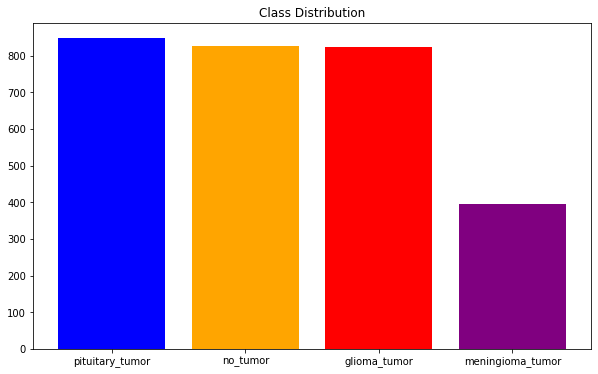

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(['pituitary_tumor', 'no_tumor', 'glioma_tumor', 'meningioma_tumor'],pd.Series(Y).value_counts(),color = ['blue','orange','red','purple'])
plt.title("Class Distribution")
plt.show()

In [ ]:
X.shape

(2890, 200, 200)

# Visualise Data

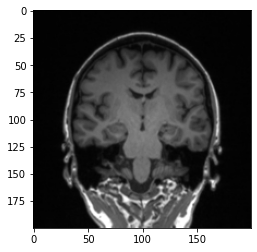

In [ ]:
plt.imshow(X[0], cmap='gray')

# Prepare Data

In [ ]:
X_updated = X.reshape(len(X), -1) #to reduce dimensionality of the data from 3 to 2
X_updated.shape

(2890, 40000)

# Split Data

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10, test_size=.20) #20 percent from 1242 is used as test data

In [ ]:
xtrain.shape, xtest.shape

((2312, 40000), (578, 40000))

# Feature Scaling

In [ ]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


# Feature Selection : PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
print(xtrain.shape, xtest.shape) # But we avoid feature selection as it reduces the features ie columns by selecting only the main images

pca= PCA(.98)
#pca_train = pca.fit_transform(xtrain)
#pca_test = pca.fit_transform(xtest)
pca_train = xtrain
pca_test = xtest

(2312, 40000) (578, 40000)


# Train Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

1. Logistic Regression

In [ ]:
import warnings
warnings.filterwarnings('ignore')
lg = LogisticRegression(penalty="l2", C=1, solver="saga", multi_class="auto", n_jobs=10, l1_ratio=0.5)
lg.fit(pca_train, ytrain)

LogisticRegression(C=1, l1_ratio=0.5, n_jobs=10, solver='saga')

2. Support Vector Machine

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
sv= SVC()
sv.fit(pca_train, ytrain)

SVC()

3. Random Forest

In [ ]:
rf=RandomForestClassifier()
rf.fit(pca_train,ytrain)

RandomForestClassifier()

4. Decision Tree

In [ ]:
dtc=DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=70, min_samples_split=70)
dtc.fit(pca_train,ytrain)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=70,
                       min_samples_split=70)

5. K Nearest Neighbors

In [ ]:
k_range=range(1,26)
scores=[]
for k in k_range:
         knn = KNeighborsClassifier(n_neighbors=k)
         knn.fit(pca_train,ytrain)
         y_pred = knn.predict(pca_test)
         scores.append(metrics.accuracy_score(ytest, y_pred))
print(scores)

[0.8996539792387543, 0.8754325259515571, 0.8581314878892734, 0.8460207612456747, 0.8217993079584776, 0.8148788927335641, 0.7889273356401384, 0.8027681660899654, 0.7906574394463668, 0.78719723183391, 0.7750865051903114, 0.7802768166089965, 0.7629757785467128, 0.7612456747404844, 0.7491349480968859, 0.7525951557093425, 0.745674740484429, 0.7439446366782007, 0.7283737024221453, 0.7231833910034602, 0.7231833910034602, 0.7301038062283737, 0.7301038062283737, 0.7179930795847751, 0.71280276816609]


In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(pca_train,ytrain)

KNeighborsClassifier(n_neighbors=3)

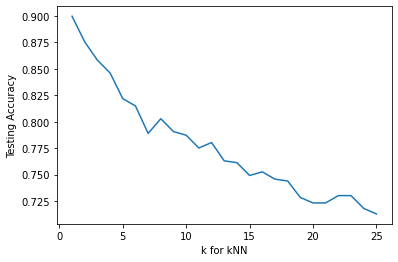

In [ ]:
import matplotlib.pyplot as plt
plt.plot(k_range,scores)
plt.xlabel('k for kNN')
plt.ylabel('Testing Accuracy')
plt.show()

6. Naive Bayes (MultinomailNB)

In [ ]:
mnb=MultinomialNB()
mnb.fit(pca_train,ytrain)

MultinomialNB()

7. Naive Bayes (GuassianNB)

In [ ]:
gnb=GaussianNB()
gnb.fit(pca_train,ytrain)

GaussianNB()

# Evaluation

1. Logistic Regression

In [ ]:
print("Training Score of Logistic Regression: ", lg.score(pca_train, ytrain)) #1 as training score means it overfits the data
print("Testing Score of Logistic Regression: ", lg.score(pca_test, ytest))

Training Score of Logistic Regression:  0.9839965397923875
Testing Score of Logistic Regression:  0.7820069204152249


2. Support Vector Machine

In [ ]:
print("Training Score of SVM: ", sv.score(pca_train, ytrain))
print("Testing Score of SVM: ", sv.score(pca_test, ytest))

Training Score of SVM:  0.9411764705882353
Testing Score of SVM:  0.8442906574394463


3. Random Forest

In [ ]:
print("Training Score of Random Forest: ", rf.score(pca_train, ytrain))
print("Testing Score of Random Forest: ", rf.score(pca_test, ytest))

Training Score of Random Forest:  1.0
Testing Score of Random Forest:  0.8996539792387543


4. Decision Tree

In [ ]:
print("Training Score of Decision Tree: ", dtc.score(pca_train, ytrain))
print("Testing Score of Decision Tree: ", dtc.score(pca_test, ytest))

Training Score of Decision Tree:  0.8685121107266436
Testing Score of Decision Tree:  0.7612456747404844


5. K Nearest Neighbors

In [ ]:
print("Training Score of KNN: ", knn.score(pca_train, ytrain))
print("Testing Score of KNN: ", knn.score(pca_test, ytest))

Training Score of KNN:  0.9299307958477508
Testing Score of KNN:  0.8581314878892734


6. Naive Bayes (MultinomialNB)

In [ ]:
print("Training Score of MultinomialNB: ", mnb.score(pca_train, ytrain))
print("Testing Score of MultinomialNB: ", mnb.score(pca_test, ytest))

Training Score of MultinomialNB:  0.5449826989619377
Testing Score of MultinomialNB:  0.5519031141868512


7. Naive Bayes (GaussianNB)

In [ ]:
print("Training Score of GaussianNB: ", gnb.score(pca_train, ytrain))
print("Testing Score of GaussianNB: ", gnb.score(pca_test, ytest))

Training Score of GaussianNB:  0.6046712802768166
Testing Score of GaussianNB:  0.6245674740484429


# Accuracy 

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, precision_score, f1_score, recall_score, plot_roc_curve

# Prediction

1. Logistic Regression

In [ ]:
pred_lg = lg.predict(pca_test)
np.where(ytest!=pred_lg)

(array([  1,   9,  12,  21,  25,  29,  30,  34,  35,  37,  43,  44,  45,
         47,  54,  55,  61,  63,  66,  68,  76,  86, 101, 111, 120, 122,
        133, 137, 140, 141, 150, 155, 173, 185, 186, 188, 190, 196, 204,
        206, 212, 216, 222, 228, 230, 233, 237, 241, 242, 260, 264, 271,
        272, 273, 275, 290, 292, 295, 300, 301, 310, 311, 314, 321, 322,
        323, 326, 329, 332, 335, 337, 339, 342, 348, 356, 358, 359, 360,
        362, 367, 368, 370, 371, 373, 375, 382, 383, 387, 390, 393, 395,
        399, 400, 409, 417, 426, 433, 437, 440, 441, 449, 454, 461, 463,
        464, 475, 478, 484, 486, 494, 498, 500, 511, 514, 516, 520, 524,
        539, 542, 544, 553, 558, 561, 564, 566, 573]),)

In [ ]:
print(classification_report(pred_lg,ytest, target_names=classes))

                  precision    recall  f1-score   support

        no_tumor       0.60      0.86      0.71        66
 pituitary_tumor       0.95      0.90      0.92       184
meningioma_tumor       0.69      0.66      0.68       157
    glioma_tumor       0.79      0.74      0.76       171

        accuracy                           0.78       578
       macro avg       0.76      0.79      0.77       578
    weighted avg       0.79      0.78      0.78       578



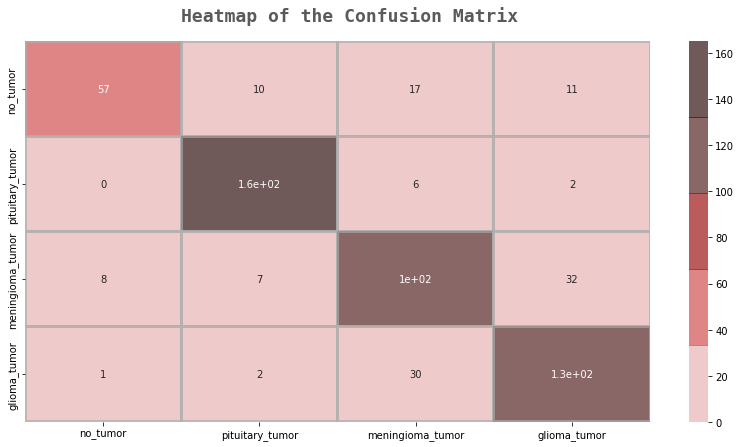

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(ytest,pred_lg),ax=ax,xticklabels=classes,yticklabels=classes,annot=True,
           cmap=colors_red[::-1],alpha=0.7,linewidths=2,linecolor=colors_dark[3])
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.92,x=0.28,alpha=0.8)

plt.show()

In [ ]:
f1_score(ytest, pred_lg,average=None)

array([0.7037037 , 0.93854749, 0.68646865, 0.77477477])

In [ ]:
precision_score(ytest, pred_lg,average='micro')

0.7923875432525952

In [ ]:
recall_score(ytest, pred_lg,pos_label='positive',average='micro')

0.7923875432525952

2. Support Vector Machine

In [ ]:
pred_sv = sv.predict(pca_test)
np.where(ytest!=pred_sv)

(array([ 12,  30,  35,  37,  43,  44,  45,  47,  54,  61,  62,  66,  78,
         82,  87,  89,  98, 108, 117, 126, 133, 137, 142, 155, 167, 173,
        190, 196, 200, 204, 206, 222, 228, 241, 265, 271, 273, 275, 292,
        295, 301, 307, 308, 310, 311, 314, 320, 321, 322, 335, 336, 337,
        342, 356, 358, 359, 362, 367, 373, 382, 387, 390, 395, 396, 401,
        413, 426, 433, 435, 438, 440, 441, 448, 449, 461, 478, 482, 484,
        494, 498, 505, 515, 516, 524, 539, 542, 544, 561, 572, 573]),)

In [ ]:
print(classification_report(pred_sv,ytest, target_names=classes))

                  precision    recall  f1-score   support

        no_tumor       0.69      0.87      0.77        76
 pituitary_tumor       0.95      0.94      0.94       175
meningioma_tumor       0.81      0.76      0.79       162
    glioma_tumor       0.85      0.82      0.83       165

        accuracy                           0.84       578
       macro avg       0.83      0.85      0.83       578
    weighted avg       0.85      0.84      0.85       578



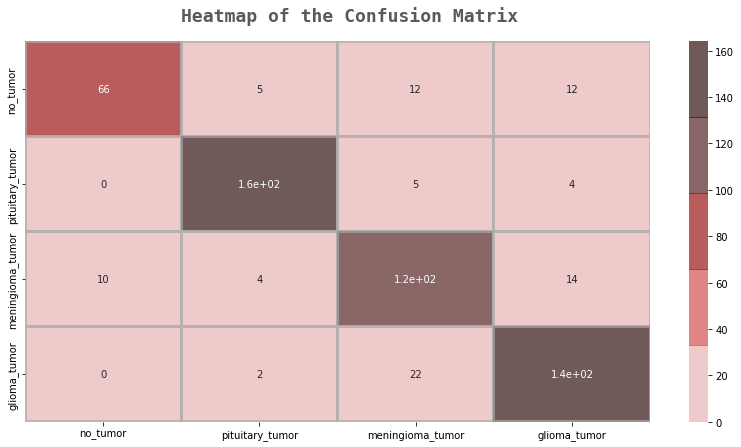

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(ytest,pred_sv),ax=ax,xticklabels=classes,yticklabels=classes,annot=True,
           cmap=colors_red[::-1],alpha=0.7,linewidths=2,linecolor=colors_dark[3])
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.92,x=0.28,alpha=0.8)

plt.show()

3. Random Forest

In [ ]:
pred_rf = rf.predict(pca_test)
np.where(ytest!=pred_rf)

(array([  1,  30,  32,  35,  37,  42,  45,  62,  66,  82,  83,  87,  96,
        108, 110, 117, 126, 137, 142, 155, 173, 190, 196, 200, 213, 217,
        230, 273, 275, 290, 301, 310, 322, 323, 327, 333, 335, 337, 347,
        359, 367, 369, 396, 401, 409, 426, 440, 441, 449, 498, 502, 505,
        515, 539, 556, 561, 568, 573]),)

In [ ]:
print(classification_report(pred_rf,ytest, target_names=classes))

                  precision    recall  f1-score   support

        no_tumor       0.86      0.88      0.87        93
 pituitary_tumor       0.96      0.95      0.96       174
meningioma_tumor       0.90      0.81      0.85       168
    glioma_tumor       0.86      0.95      0.90       143

        accuracy                           0.90       578
       macro avg       0.89      0.90      0.90       578
    weighted avg       0.90      0.90      0.90       578



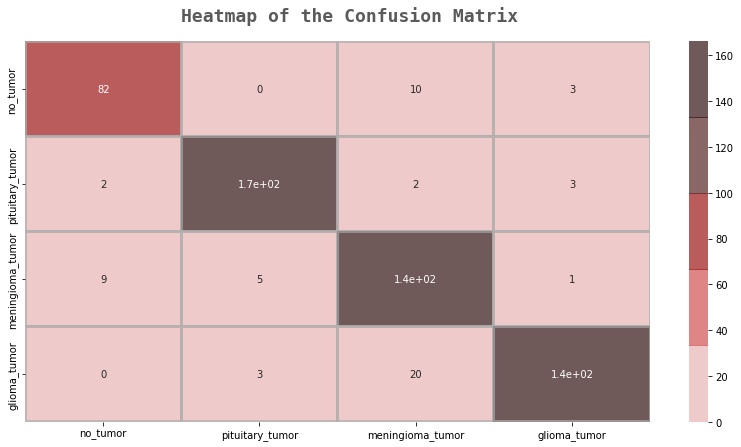

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(ytest,pred_rf),ax=ax,xticklabels=classes,yticklabels=classes,annot=True,
           cmap=colors_red[::-1],alpha=0.7,linewidths=2,linecolor=colors_dark[3])
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.92,x=0.28,alpha=0.8)

plt.show()

4. Decision Tree

In [ ]:
pred_dtc = dtc.predict(pca_test)
np.where(ytest!=pred_dtc)

(array([  1,   5,  11,  15,  19,  22,  24,  26,  29,  30,  37,  40,  42,
         43,  44,  46,  57,  58,  61,  66,  68,  73,  78,  79,  80,  83,
         87,  94,  96,  98, 108, 110, 125, 126, 131, 132, 133, 135, 137,
        144, 148, 150, 155, 163, 166, 173, 174, 181, 185, 188, 204, 206,
        207, 208, 209, 212, 213, 222, 223, 224, 230, 237, 240, 253, 257,
        261, 264, 268, 273, 275, 276, 277, 278, 294, 298, 300, 301, 305,
        306, 310, 315, 320, 321, 322, 327, 330, 333, 338, 348, 349, 358,
        359, 362, 369, 390, 391, 394, 396, 398, 399, 401, 403, 405, 409,
        411, 413, 423, 426, 427, 435, 437, 438, 444, 449, 465, 466, 468,
        477, 478, 482, 485, 497, 499, 505, 512, 514, 516, 520, 529, 530,
        539, 542, 543, 550, 551, 556, 559, 569]),)

In [ ]:
print(classification_report(pred_dtc,ytest, target_names=classes))

                  precision    recall  f1-score   support

        no_tumor       0.58      0.86      0.69        64
 pituitary_tumor       0.87      0.89      0.88       168
meningioma_tumor       0.74      0.61      0.67       181
    glioma_tumor       0.78      0.75      0.77       165

        accuracy                           0.76       578
       macro avg       0.74      0.78      0.75       578
    weighted avg       0.77      0.76      0.76       578



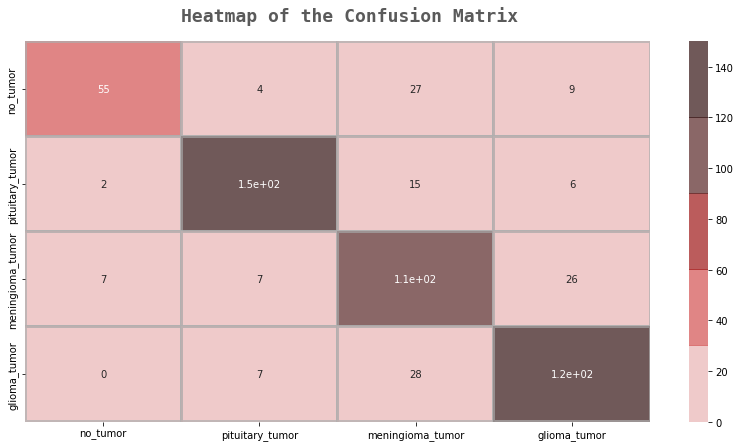

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(ytest,pred_dtc),ax=ax,xticklabels=classes,yticklabels=classes,annot=True,
           cmap=colors_red[::-1],alpha=0.7,linewidths=2,linecolor=colors_dark[3])
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.92,x=0.28,alpha=0.8)

plt.show()

5. K Nearest Neighbors

In [ ]:
pred_knn = knn.predict(pca_test)
np.where(ytest!=pred_knn)

(array([  1,  12,  21,  24,  30,  32,  37,  66,  84,  86, 101, 126, 128,
        137, 142, 150, 155, 165, 188, 190, 196, 203, 233, 237, 261, 264,
        273, 292, 301, 308, 323, 327, 330, 332, 335, 336, 338, 339, 342,
        343, 356, 357, 359, 362, 365, 373, 382, 384, 395, 396, 399, 401,
        405, 419, 426, 429, 433, 441, 448, 459, 474, 478, 482, 484, 491,
        494, 495, 498, 516, 520, 525, 539, 542, 550, 553, 554, 556, 559,
        561, 564, 571, 573]),)

In [ ]:
print(classification_report(pred_knn,ytest, target_names=classes))

                  precision    recall  f1-score   support

        no_tumor       0.74      0.76      0.75        92
 pituitary_tumor       0.98      0.93      0.95       182
meningioma_tumor       0.71      0.92      0.80       116
    glioma_tumor       0.94      0.80      0.86       188

        accuracy                           0.86       578
       macro avg       0.84      0.85      0.84       578
    weighted avg       0.87      0.86      0.86       578



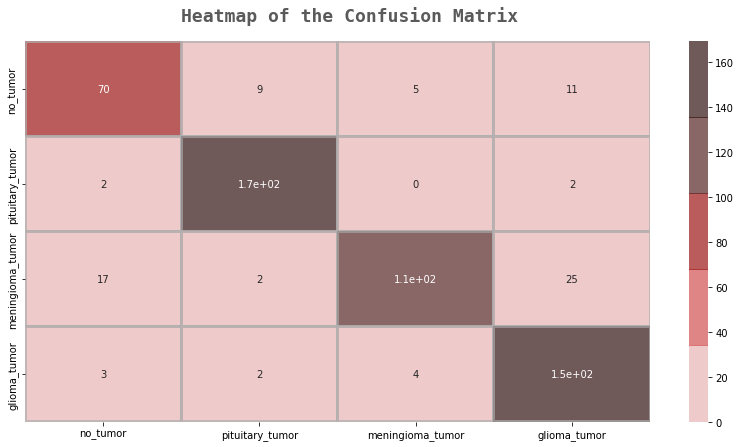

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(ytest,pred_knn),ax=ax,xticklabels=classes,yticklabels=classes,annot=True,
           cmap=colors_red[::-1],alpha=0.7,linewidths=2,linecolor=colors_dark[3])
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.92,x=0.28,alpha=0.8)

plt.show()

6. Naive Bayes (MultinomailNB)

In [ ]:
pred_mnb = mnb.predict(pca_test)
np.where(ytest!=pred_mnb)

(array([  1,   5,   6,   7,   9,  11,  12,  21,  24,  25,  28,  29,  30,
         32,  34,  35,  37,  40,  43,  44,  46,  47,  48,  50,  51,  52,
         54,  55,  58,  63,  68,  71,  76,  84,  86,  87,  89,  92,  96,
         98, 101, 112, 114, 115, 117, 118, 121, 122, 124, 128, 131, 132,
        133, 135, 137, 142, 143, 144, 146, 148, 150, 152, 153, 154, 155,
        156, 161, 163, 165, 166, 168, 172, 175, 176, 177, 181, 184, 185,
        186, 189, 190, 193, 196, 197, 200, 201, 203, 204, 206, 207, 208,
        209, 211, 212, 213, 215, 223, 225, 228, 229, 230, 233, 236, 237,
        242, 243, 245, 246, 247, 249, 256, 257, 261, 264, 266, 269, 271,
        272, 275, 276, 277, 278, 280, 283, 286, 292, 296, 299, 301, 302,
        303, 306, 308, 312, 314, 315, 318, 319, 321, 325, 329, 330, 331,
        332, 335, 336, 337, 338, 339, 342, 343, 344, 346, 353, 357, 358,
        359, 360, 361, 362, 365, 367, 368, 369, 370, 374, 375, 377, 382,
        384, 385, 387, 390, 391, 394, 395, 399, 405

In [ ]:
print(classification_report(pred_mnb,ytest, target_names=classes))

                  precision    recall  f1-score   support

        no_tumor       0.27      0.68      0.39        38
 pituitary_tumor       0.77      0.70      0.74       191
meningioma_tumor       0.21      0.47      0.29        66
    glioma_tumor       0.81      0.45      0.58       283

        accuracy                           0.55       578
       macro avg       0.51      0.58      0.50       578
    weighted avg       0.69      0.55      0.59       578



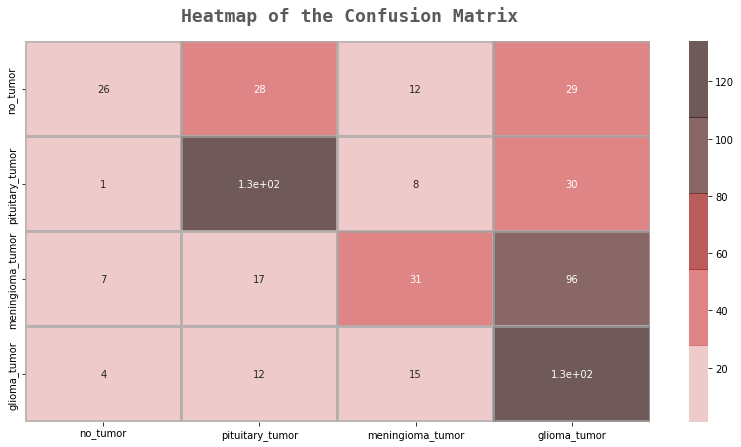

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(ytest,pred_mnb),ax=ax,xticklabels=classes,yticklabels=classes,annot=True,
           cmap=colors_red[::-1],alpha=0.7,linewidths=2,linecolor=colors_dark[3])
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.92,x=0.28,alpha=0.8)

plt.show()

7. Naive Bayes (GaussianNB)

In [ ]:
pred_gnb = gnb.predict(pca_test)
np.where(ytest!=pred_gnb)

(array([  4,   5,   6,   7,  11,  12,  14,  21,  24,  25,  26,  28,  29,
         30,  32,  34,  35,  37,  44,  47,  50,  51,  54,  55,  66,  76,
         78,  83,  84,  86,  87,  89,  96,  98, 101, 108, 109, 111, 112,
        114, 115, 121, 124, 126, 131, 135, 137, 138, 142, 143, 144, 146,
        148, 150, 152, 153, 160, 162, 163, 165, 166, 168, 169, 172, 177,
        181, 184, 186, 190, 193, 195, 196, 197, 200, 203, 204, 208, 211,
        212, 215, 225, 228, 229, 233, 234, 236, 242, 243, 245, 246, 249,
        251, 256, 261, 264, 266, 269, 271, 272, 275, 276, 284, 296, 299,
        301, 302, 303, 304, 308, 312, 314, 315, 317, 318, 319, 320, 321,
        325, 329, 330, 331, 332, 336, 339, 342, 345, 346, 352, 353, 356,
        357, 359, 360, 362, 365, 367, 369, 373, 374, 375, 377, 379, 382,
        383, 384, 387, 390, 391, 394, 398, 399, 401, 403, 411, 413, 415,
        417, 419, 426, 427, 429, 433, 434, 435, 438, 440, 446, 447, 448,
        451, 454, 457, 458, 459, 461, 464, 468, 473

In [ ]:
print(classification_report(pred_gnb,ytest, target_names=classes))

                  precision    recall  f1-score   support

        no_tumor       0.55      0.68      0.61        76
 pituitary_tumor       0.80      0.89      0.84       157
meningioma_tumor       0.12      0.38      0.18        47
    glioma_tumor       0.96      0.51      0.67       298

        accuracy                           0.62       578
       macro avg       0.61      0.62      0.57       578
    weighted avg       0.79      0.62      0.67       578



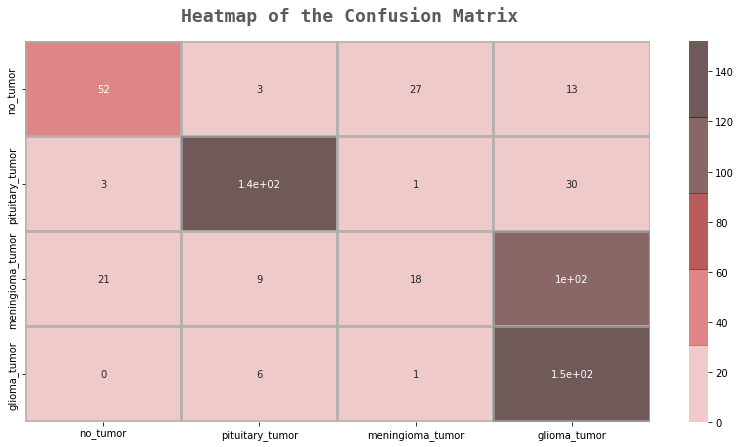

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(ytest,pred_gnb),ax=ax,xticklabels=classes,yticklabels=classes,annot=True,
           cmap=colors_red[::-1],alpha=0.7,linewidths=2,linecolor=colors_dark[3])
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.92,x=0.28,alpha=0.8)

plt.show()

In [ ]:
pred_sv[13]

1

In [ ]:
ytest[13]

1

# Test Model

In [ ]:
dec = {0: 'No Tumor', 1:'Pituitary', 2:'meningioma_tumor', 3:'glioma_tumor'}

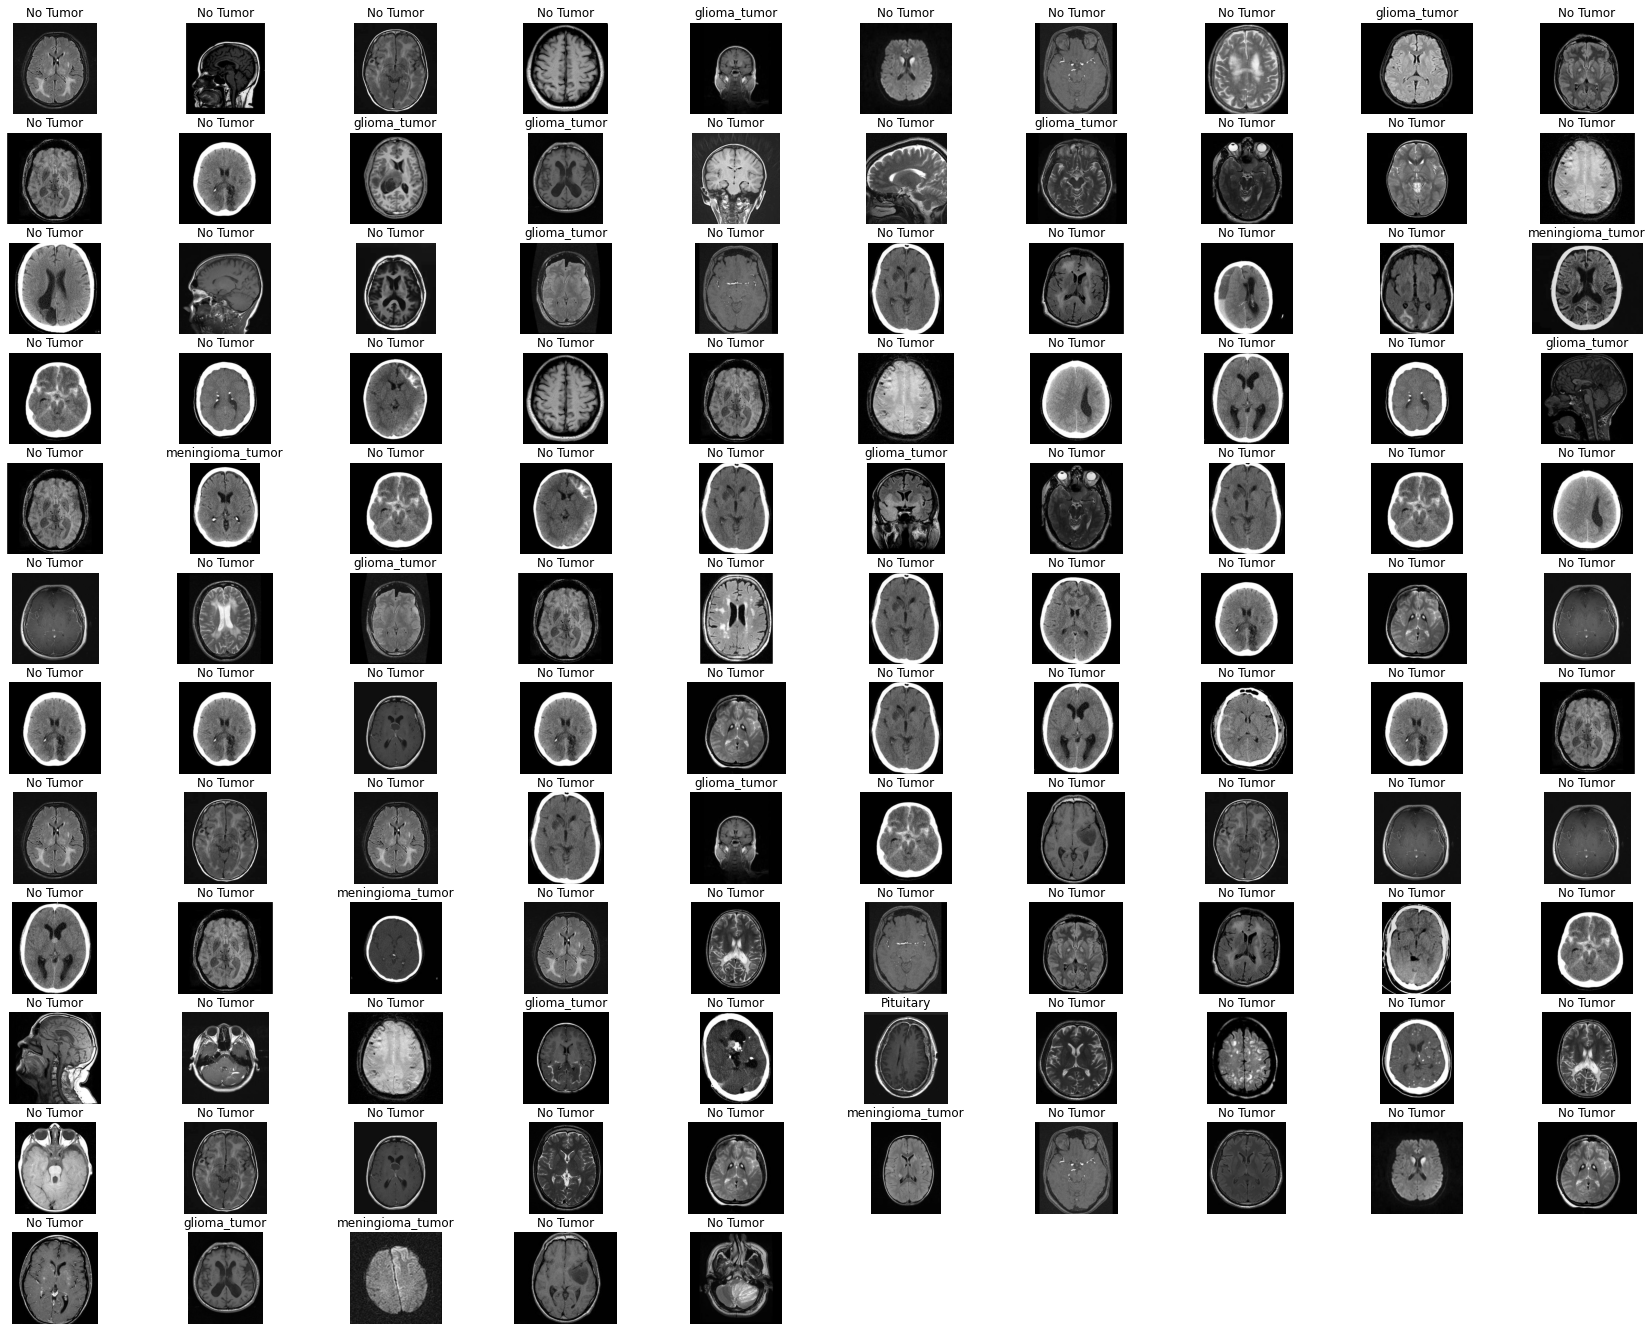

In [ ]:
plt.figure(figsize=(30, 30))
p = os.listdir('/content/drive/MyDrive/brain_tumor/Testing/')
c=1
for i in os.listdir('/content/drive/MyDrive/brain_tumor/Testing/no_tumor/')[:150]:
  plt.subplot(15,10,c)

  img=cv2.imread('/content/drive/MyDrive/brain_tumor/Testing/no_tumor/'+i,0)
  img1 = cv2.resize(img,(200,200))
  img1 = img1.reshape(1,-1)/255
  p = sv.predict(img1)
  plt.title(dec[p[0]])
  plt.imshow(img, cmap='gray')
  plt.axis('off')
  c+=1

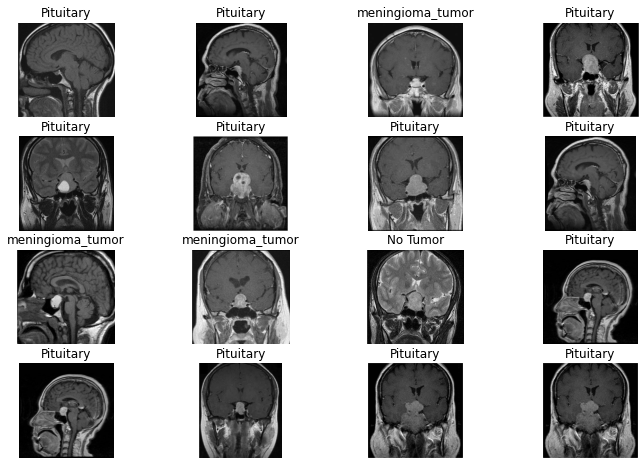

In [ ]:
plt.figure(figsize=(12, 8))
p = os.listdir('/content/drive/MyDrive/brain_tumor/Testing/')
c=1
for i in os.listdir('/content/drive/MyDrive/brain_tumor/Testing/pituitary_tumor/')[:16]:
  plt.subplot(4,4,c)

  img=cv2.imread('/content/drive/MyDrive/brain_tumor/Testing/pituitary_tumor/'+i,0)
  img1 = cv2.resize(img,(200,200))
  img1 = img1.reshape(1,-1)/255
  p = sv.predict(img1)
  plt.title(dec[p[0]])
  plt.imshow(img, cmap='gray')
  plt.axis('off')
  c+=1

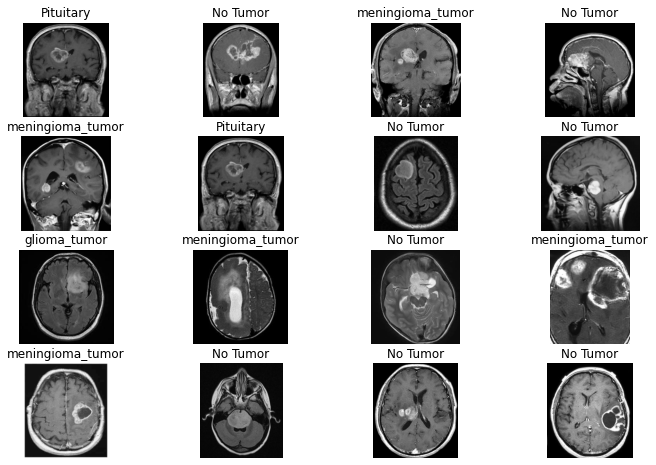

In [ ]:
plt.figure(figsize=(12, 8))
p = os.listdir('/content/drive/MyDrive/brain_tumor/Testing/')
c=1
for i in os.listdir('/content/drive/MyDrive/brain_tumor/Testing/glioma_tumor/')[:16]:
  plt.subplot(4,4,c)

  img=cv2.imread('/content/drive/MyDrive/brain_tumor/Testing/glioma_tumor/'+i,0)
  img1 = cv2.resize(img,(200,200))
  img1 = img1.reshape(1,-1)/255
  p = sv.predict(img1)
  plt.title(dec[p[0]])
  plt.imshow(img, cmap='gray')
  plt.axis('off')
  c+=1

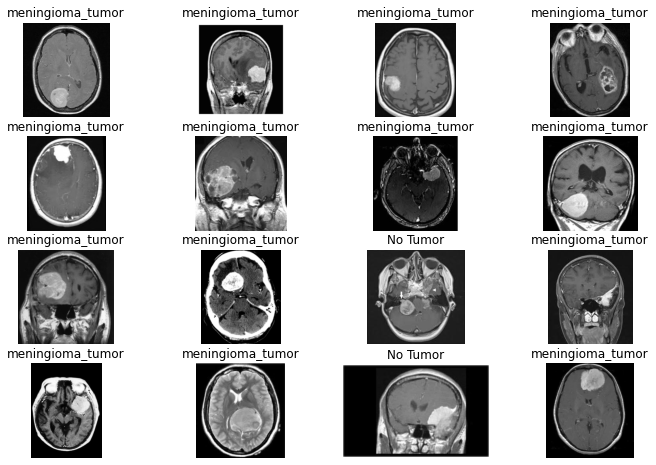

In [ ]:
plt.figure(figsize=(12, 8))
p = os.listdir('/content/drive/MyDrive/brain_tumor/Testing/')
c=1
for i in os.listdir('/content/drive/MyDrive/brain_tumor/Testing/meningioma_tumor/')[:16]:
  plt.subplot(4,4,c)

  img=cv2.imread('/content/drive/MyDrive/brain_tumor/Testing/meningioma_tumor/'+i,0)
  img1 = cv2.resize(img,(200,200))
  img1 = img1.reshape(1,-1)/255
  p = sv.predict(img1)
  plt.title(dec[p[0]])
  plt.imshow(img, cmap='gray')
  plt.axis('off')
  c+=1

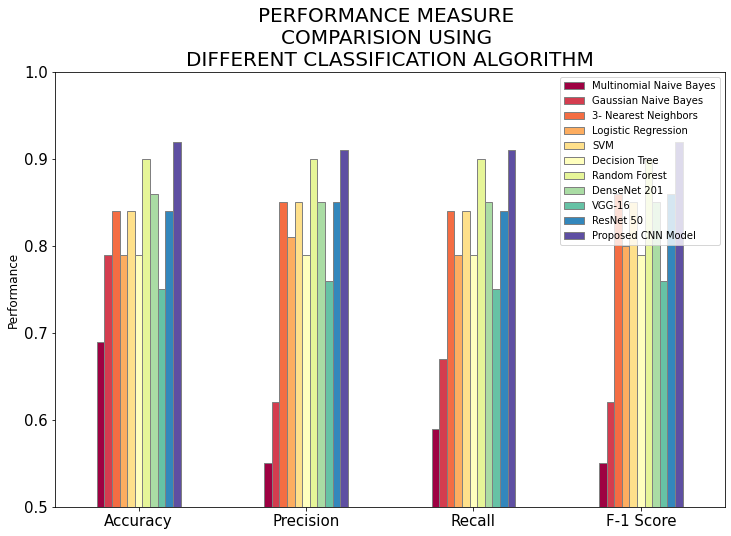

In [ ]:
models_metrics = {'Multinomial Naive Bayes' : [0.69,0.55,0.59,0.55],
                  'Gaussian Naive Bayes' : [0.79,0.62,0.67,0.62],
                  '3- Nearest Neighbors' : [0.84,0.85,0.84,0.86],
                  'Logistic Regression' : [0.79,0.81,0.79,0.80],
                 'SVM' : [0.84,0.85,0.84,0.85],
                  'Decision Tree' : [0.79,0.79,0.79,0.79],
                  'Random Forest' : [0.90,0.90,0.90,0.90],
                  'DenseNet 201' : [0.86,0.85,0.85,0.85],
                  'VGG-16' : [0.75,0.76,0.75,0.76],
                  'ResNet 50' : [0.84,0.85,0.84,0.86],
                  'Proposed CNN Model' : [0.92,0.91,0.91,0.92],
                }
df_compare = pd.DataFrame(data = models_metrics)
df_compare.rename(index={0:'Accuracy',1:'Precision', 2: 'Recall', 3: 'F-1 Score'}, 
                 inplace=True)
ax = df_compare.plot(kind='bar', figsize = (12,8), ylim = (0.50, 1), 
        colormap='Spectral',
        rot = 0, 
        edgecolor = 'grey', alpha = 1,
        fontsize=15)
        
plt.ylabel('Performance',fontsize=12,color='black')
plt.title('PERFORMANCE MEASURE \nCOMPARISION USING \nDIFFERENT CLASSIFICATION ALGORITHM',fontsize=20,color='black')
plt.show()